# Import Libraires

In [187]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


In [251]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Load dataset

In [252]:

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/training_set_label.csv")


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   founded_at                923 non-null    object 
 10  closed_at                 335 non-null    object 
 11  first_funding_at          923 non-null    object 
 12  last_funding_at           923 non-null    object 
 13  age_first_funding_year    923 non-null    float64
 14  age_last_f

In [254]:
df.describe()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [255]:
df.isna().count()

,0
Unnamed: 0,923
state_code,923
latitude,923
longitude,923
zip_code,923
id,923
city,923
Unnamed: 6,923
name,923
founded_at,923


In [256]:
# selecting those which are relevant and not redundant
df=df.get(["funding_rounds","funding_total_usd","is_CA","is_NY","is_MA","is_TX","is_otherstate",
           'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
           'age_last_milestone_year',"has_VC","has_angel","has_roundA","has_roundB","has_roundC","relationships","has_roundD"
           ,"avg_participants","milestones","is_top500","category_code","status"])

# Data Transformation

In [257]:

data = df.drop(columns=['status'])  # Features
data['status_encoded'] = LabelEncoder().fit_transform(df['status'])
target = data['status_encoded']
status=df['status']

In [258]:
categorical_columns = data.select_dtypes(include=['category', 'object', 'string']).columns
features_num = data.select_dtypes(exclude=['category', 'object', 'string']).columns

In [259]:
cat_features=[]
for i in categorical_columns:
  cat_features+=data[i].unique().tolist()

In [260]:
cat_features

['music',
 'enterprise',
 'web',
 'software',
 'games_video',
 'network_hosting',
 'finance',
 'mobile',
 'education',
 'public_relations',
 'security',
 'other',
 'photo_video',
 'hardware',
 'ecommerce',
 'advertising',
 'travel',
 'fashion',
 'analytics',
 'consulting',
 'biotech',
 'cleantech',
 'search',
 'semiconductor',
 'social',
 'medical',
 'automotive',
 'messaging',
 'manufacturing',
 'hospitality',
 'news',
 'transportation',
 'sports',
 'real_estate',
 'health']

In [261]:
data[numerical_features].describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
count,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000
mean,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,2.838586
std,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,1.874601
min,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,1.000000
25%,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,1.500000
50%,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,2.500000
75%,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,3.800000
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000


In [262]:

# Define pipelines
transformer_num = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("Scaler",MinMaxScaler())
])

transformer_cat = Pipeline([
    ("cat_imputer", SimpleImputer(strategy="constant", fill_value="NA")),
    ("onehotencoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Sparse output disabled
])

# Apply transformations
data_num = pd.DataFrame(
    transformer_num.fit_transform(data[features_num]),
    columns=features_num
)
data_cat = pd.DataFrame(
    transformer_cat.fit_transform(data[categorical_columns]),
    columns= cat_features
)

# Combine transformed columns
data = pd.concat([data_num, data_cat,data['category_code']], axis=1)



# EDA

<ipython-input-263-1559793e973b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_correlations.drop('status_encoded',inplace=True)


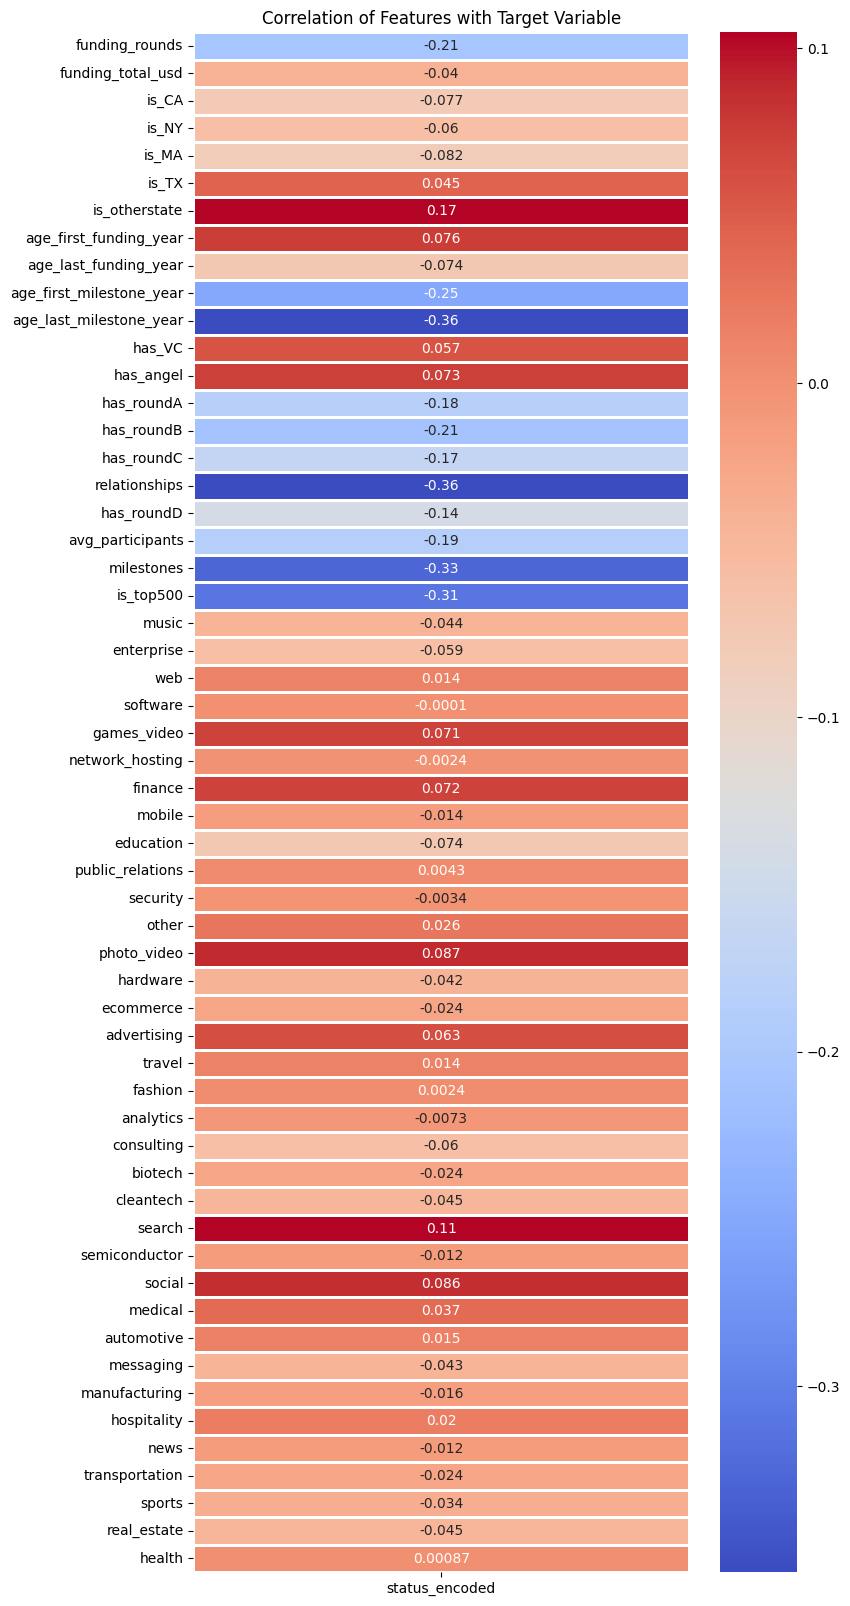

In [263]:

correlation_matrix = data.loc[:, ~data.columns.isin(['category_code'])].corr()
target_correlations = correlation_matrix[["status_encoded"]]
target_correlations.drop('status_encoded',inplace=True)
plt.figure(figsize=(8, 20))
sn.heatmap(target_correlations, annot=True, cmap="coolwarm", linewidths=1, robust=True)
plt.title('Correlation of Features with Target Variable')
plt.show()


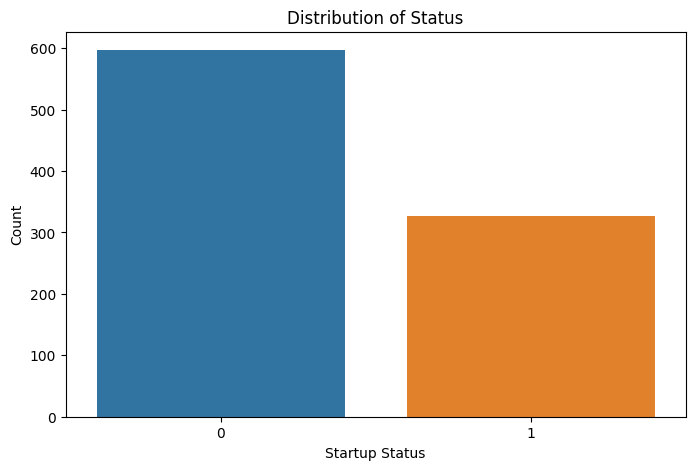

In [264]:
# 1. Understanding the target variable distribution
status_counts = target.value_counts()

# 2. Visualizing the target distribution
plt.figure(figsize=(8, 5))
sn.countplot(data= data, x=target, order=status_counts.index,hue=target, legend=False)
plt.title('Distribution of Status')
plt.xlabel('Startup Status')
plt.ylabel('Count')
plt.show()


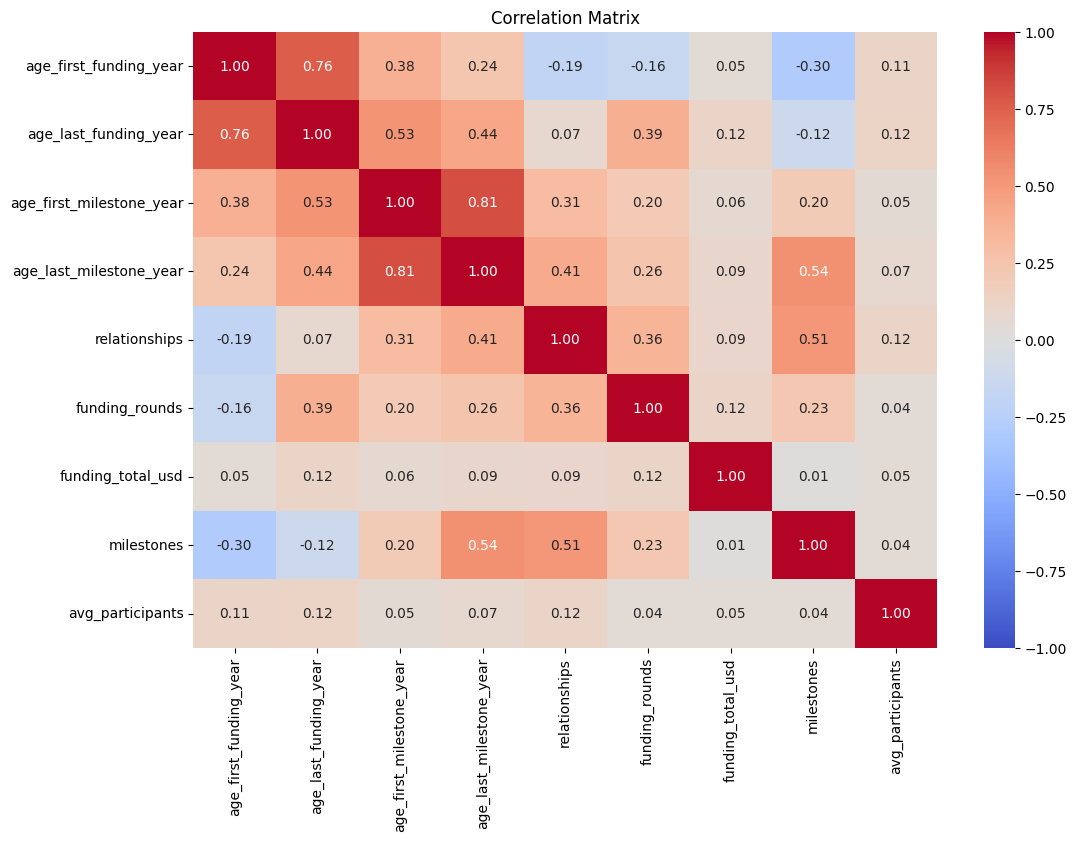

In [265]:
# Analyze numerical features against the target variable
numerical_features = [
    'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
    'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd',
    'milestones', 'avg_participants'
]
correlations = data[numerical_features].corr()

# Visualizing correlation matrix
plt.figure(figsize=(12, 8))
sn.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

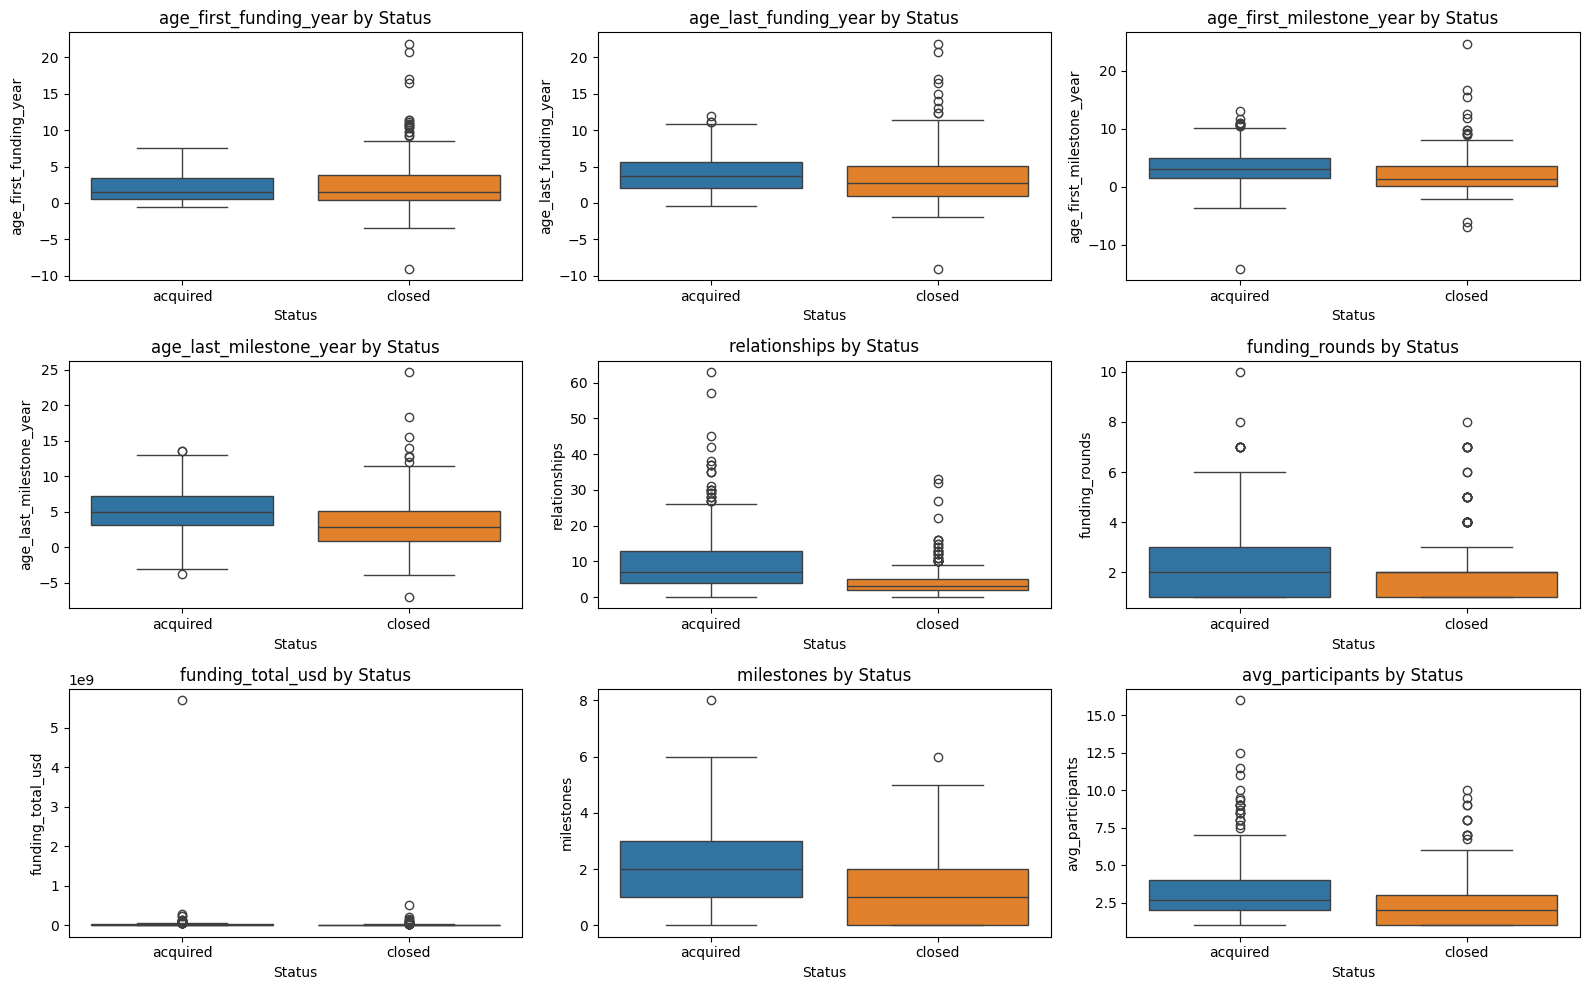

In [266]:

# Numerical feature distributions by status
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sn.boxplot(data=df, x=status, y=feature,hue=status)
    plt.title(f'{feature} by Status')
    plt.xlabel('Status')
    plt.ylabel(feature)
    plt.tight_layout()
plt.show()

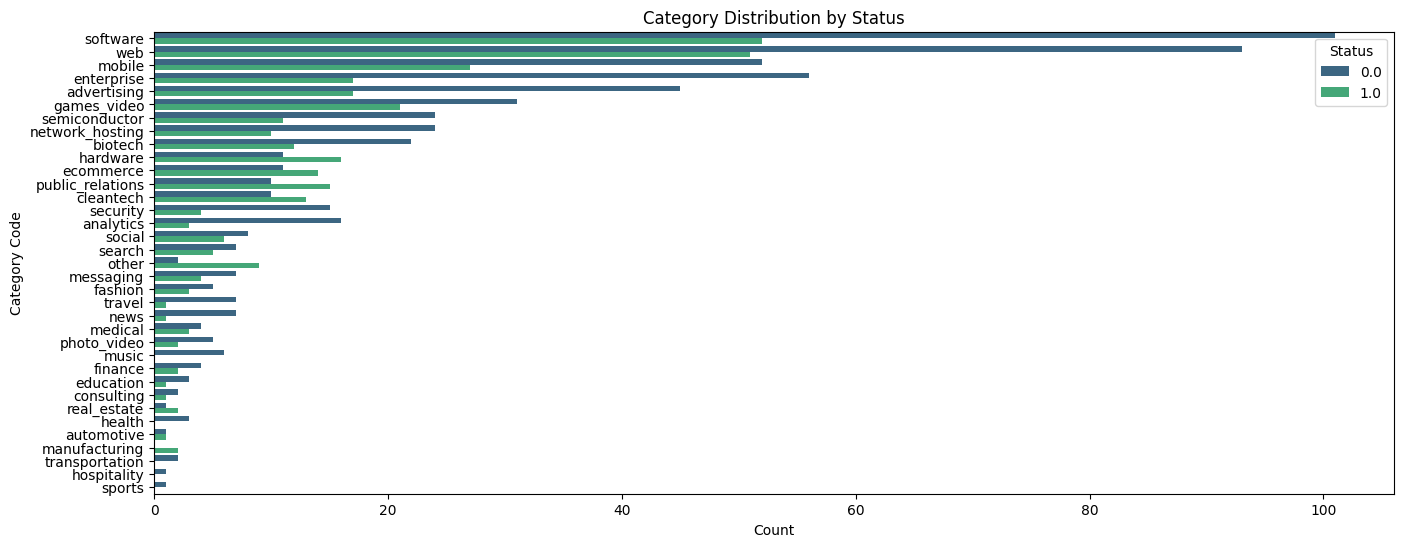

In [267]:

# Examining categorical features (category_code and state_code)
plt.figure(figsize=(16, 6))
sn.countplot(
    data=data,
    y='category_code',
    order=df['category_code'].value_counts().index,
    hue='status_encoded',
    palette='viridis'
)
plt.title('Category Distribution by Status')
plt.xlabel('Count')
plt.ylabel('Category Code')
plt.legend(title='Status')
plt.show()


# Train Test Split

In [268]:
# Remove 'status' column from data after correlation analysis
data.drop(columns=['status_encoded','category_code'], inplace=True)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, test_size=0.35, random_state=42)


# Training RandomForestClassifier

Accuracy: 0.7932098765432098
Precision: 0.7841501314845805
Recall: 0.7482456140350877
F1-score: 0.7596944705817236


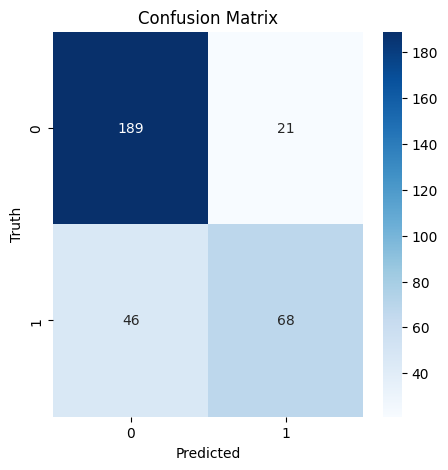

In [269]:


# Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Adjust for imbalance
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:30:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.75
Precision: 0.7258524514532567
Recall: 0.724937343358396
F1-score: 0.7253863781430829


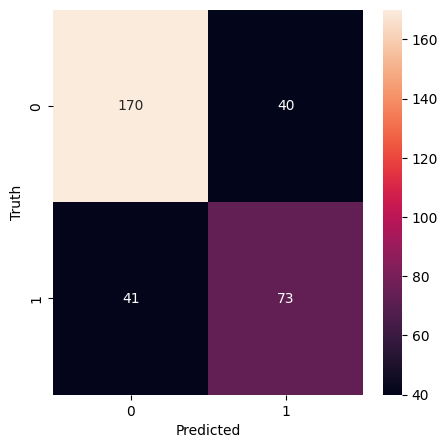

In [270]:
from xgboost import XGBClassifier

# Model
xgb_model = XGBClassifier(
    scale_pos_weight=len(target[target == 0]) / len(target[target == 1]),  # Balance classes
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


[LightGBM] [Info] Number of positive: 212, number of negative: 387
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

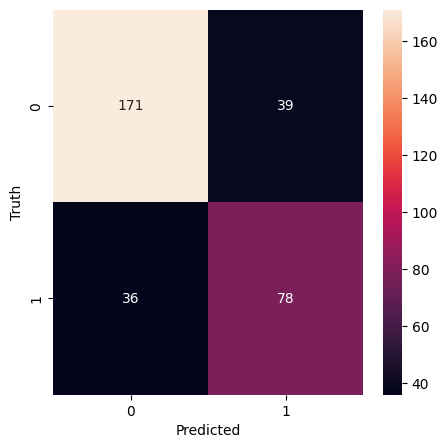

In [271]:
from lightgbm import LGBMClassifier

# Model
lgb_model = LGBMClassifier(
    class_weight='balanced',  # Auto-balance the classes
    random_state=42
)

# Train
lgb_model.fit(X_train, y_train)

# Predict
y_pred = lgb_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


Accuracy: 0.7839506172839507
Precision: 0.7631578947368421
Recall: 0.7631578947368421
F1-score: 0.7631578947368421


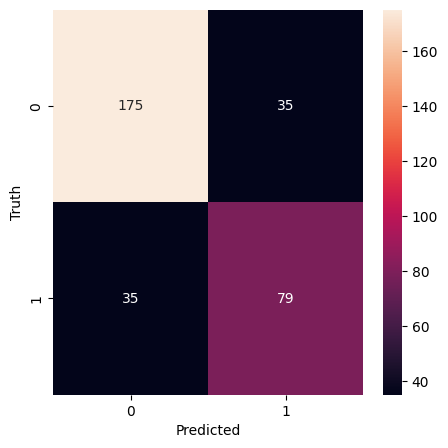

In [272]:
from catboost import CatBoostClassifier

# Model
cat_model = CatBoostClassifier(
    class_weights=[1, len(target[target == 0]) / len(target[target == 1])],
    random_seed=42,
    verbose=0
)

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred = cat_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
